# Data cleaning and exploration

In [1]:
import os
os.chdir("..")

In [2]:
import pandas as pd
import numpy as np

In [3]:
pd.set_option("display.max_rows", 5)
pd.set_option('display.max_columns', 5)
pd.set_option('display.max_colwidth', None)

### Load data

In [4]:
df = pd.read_excel('data/raw/eikon_export.xlsx', engine='openpyxl')
df

,Identifier,Company_Name,...,SDG17,Year
0,408680426,NaN,...,NaN,FY0
1,.ONECAD,NaN,...,NaN,FY0
...,...,...,...,...,...
8952,TRST.L,Trustpilot Group PLC,...,NaN,FY-1
8953,WIX.L,Wickes Group PLC,...,NaN,FY-1


### Clean data

In [5]:
# Remove companies without SDG labels
df_clean = df[~df['SDG1'].isna()]
# Remove duplicates (based on company name, identifier can be different)
df_clean = df_clean.drop_duplicates(['Company_Name', 'Year'], keep='first').reset_index(drop=True)

# Remove companies without CSR
#df_reports = df[~df['CSR_Report_URL'].isna()]
# Only keep companies for which a .pdf url exists
#df_reports = df_reports[df_reports['CSR_Report_URL'].str.contains('.pdf')]

df_clean

,Identifier,Company_Name,...,SDG17,Year
0,BCE_py.TO,BCE Inc,...,1.0,FY0
1,ENB_pa.TO,Enbridge Inc,...,1.0,FY0
...,...,...,...,...,...
7037,JETJ.L,Just Eat Takeaway.com NV,...,0.0,FY-1
7038,SSON.L,Smithson Investment Trust PLC,...,0.0,FY-1


### Explore data

# companies with at least one SDG = True: 1208
# companies with all SDG = False: 5831


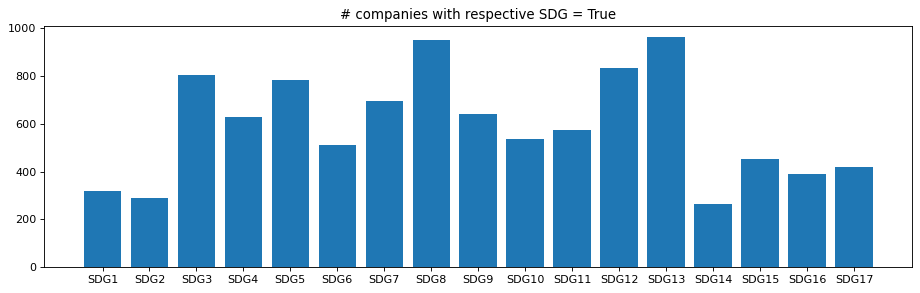

# positive labels: 10050


In [6]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Companies with at least one SDG = True
df_positive_label = df_clean[(df_clean['SDG1'] == True) | (df_clean['SDG2'] == True) | (df_clean['SDG3'] == True) | (df_clean['SDG4'] == True) | (df_clean['SDG5'] == True) | (df_clean['SDG6'] == True) | (df_clean['SDG7'] == True) | (df_clean['SDG8'] == True) | (df_clean['SDG9'] == True) | (df_clean['SDG10'] == True) | (df_clean['SDG11'] == True) | (df_clean['SDG12'] == True) | (df_clean['SDG13'] == True) | (df_clean['SDG14'] == True) | (df_clean['SDG15'] == True) | (df_clean['SDG16'] == True) | (df_clean['SDG17'] == True)].reset_index(drop=True)
print('# companies with at least one SDG = True: '+ str(len(df_positive_label)))

# Companies that align to no SDG
df_negative_label = pd.concat([df_clean,df_positive_label]).drop_duplicates(keep=False).reset_index(drop=True)
print('# companies with all SDG = False: ' + str(len(df_negative_label)))

# Number of positive examples for each sdg
list1 = []
list2 = []
for i in range(1,18):
    sdg = 'SDG'+ str(i)
    list1.append(sdg)
    list2.append(sum(df_clean[sdg] == True))
figure(figsize=(14, 4), dpi=80)
plt.bar(list1, list2)
plt.title('# companies with respective SDG = True')
plt.show()

# Total number of positive labels
print('# positive labels: ' + str(sum(list2)))

# Extract potential training data
- For some SDG labels, the source with the corresponding page number is given
- Due to the nature of the dataset, (manual) preprocessing is required

In [7]:
# Select relevant columns
df_train = df_positive_label[['Identifier', 'CSR_Report_URL', 'SDG1_Page_1', 'SDG1_Page_2', 'SDG1_URL_1', 'SDG1_URL_2', 'SDG1', 'SDG2_Page_1', 'SDG2_Page_2', 'SDG2_URL_1', 'SDG2_URL_2', 'SDG2', 'SDG3_Page_1', 'SDG3_Page_2', 'SDG3_URL_1', 'SDG3_URL_2', 'SDG3', 'SDG4_Page_1', 'SDG4_Page_2', 'SDG4_URL_1', 'SDG4_URL_2', 'SDG4', 'SDG5_Page_1', 'SDG5_Page_2', 'SDG5_URL_1', 'SDG5_URL_2', 'SDG5', 'SDG6_Page_1', 'SDG6_Page_2', 'SDG6_URL_1', 'SDG6_URL_2', 'SDG6', 'SDG7_Page_1', 'SDG7_Page_2', 'SDG7_URL_1', 'SDG7_URL_2', 'SDG7', 'SDG8_Page_1', 'SDG8_Page_2', 'SDG8_URL_1', 'SDG8_URL_2', 'SDG8', 'SDG9_Page_1', 'SDG9_Page_2', 'SDG9_URL_1', 'SDG9_URL_2', 'SDG9', 'SDG10_Page_1', 'SDG10_Page_2', 'SDG10_URL_1', 'SDG10_URL_2', 'SDG10', 'SDG11_Page_1', 'SDG11_Page_2', 'SDG11_URL_1', 'SDG11_URL_2', 'SDG11', 'SDG12_Page_1', 'SDG12_Page_2', 'SDG12_URL_1', 'SDG12_URL_2', 'SDG12', 'SDG13_Page_1', 'SDG13_Page_2', 'SDG13_URL_1', 'SDG13_URL_2', 'SDG13', 'SDG14_Page_1', 'SDG14_Page_2', 'SDG14_URL_1', 'SDG14_URL_2', 'SDG14', 'SDG15_Page_1', 'SDG15_Page_2', 'SDG15_URL_1', 'SDG15_URL_2', 'SDG15', 'SDG16_Page_1', 'SDG16_Page_2', 'SDG16_URL_1', 'SDG16_URL_2', 'SDG16', 'SDG17_Page_1', 'SDG17_Page_2', 'SDG17_URL_1', 'SDG17_URL_2', 'SDG17']]
# Remove companies without any page numbers
df_train = df_train[~df_train['SDG1_Page_1'].isna() | ~df_train['SDG1_Page_2'].isna() | ~df_train['SDG2_Page_1'].isna() | ~df_train['SDG2_Page_2'].isna() | ~df_train['SDG3_Page_1'].isna() | ~df_train['SDG3_Page_2'].isna() | ~df_train['SDG4_Page_1'].isna() | ~df_train['SDG4_Page_2'].isna() | ~df_train['SDG5_Page_1'].isna() | ~df_train['SDG5_Page_2'].isna() | ~df_train['SDG6_Page_1'].isna() | ~df_train['SDG6_Page_2'].isna() | ~df_train['SDG7_Page_1'].isna() | ~df_train['SDG7_Page_2'].isna() | ~df_train['SDG8_Page_1'].isna() | ~df_train['SDG8_Page_2'].isna() | ~df_train['SDG9_Page_1'].isna() | ~df_train['SDG9_Page_2'].isna() | ~df_train['SDG10_Page_1'].isna() | ~df_train['SDG10_Page_2'].isna() | ~df_train['SDG11_Page_1'].isna() | ~df_train['SDG11_Page_2'].isna() | ~df_train['SDG12_Page_1'].isna() | ~df_train['SDG12_Page_2'].isna() | ~df_train['SDG13_Page_1'].isna() | ~df_train['SDG13_Page_2'].isna() | ~df_train['SDG14_Page_1'].isna() | ~df_train['SDG14_Page_2'].isna() | ~df_train['SDG15_Page_1'].isna() | ~df_train['SDG15_Page_2'].isna() | ~df_train['SDG16_Page_1'].isna() | ~df_train['SDG16_Page_2'].isna() | ~df_train['SDG17_Page_1'].isna() | ~df_train['SDG17_Page_2'].isna()].reset_index(drop=True)
df_train

,Identifier,CSR_Report_URL,...,SDG17_URL_2,SDG17
0,BCE_py.TO,https://www.bce.ca/responsibility/overview/2020-cr-report.pdf,...,NaN,1.0
1,ENB_pa.TO,https://www.enbridge.com/~/media/Enb/Documents/Reports/Sustainability%20Report%202020/Enbridge_SR_2020.pdf,...,NaN,1.0
...,...,...,...,...,...
1137,BBGIB.L,https://www.bb-gi.com/media/1918/2019-bbgi-annual-report-final-glossy.pdf,...,NaN,0.0
1138,TRIG.L,https://www.trig-ltd.com/sites/default/files/18%20Feb%20TRIG%20Annual%20Report%20and%20Accounts%209.03.pdf,...,NaN,0.0


### Modify df to handle multiple sources for each label (needs to be done manually)

In [8]:
# Select companies with multiple URLs
df_train_second_url = df_train[~df_train['SDG1_URL_2'].isna() | ~df_train['SDG2_URL_2'].isna() | ~df_train['SDG3_URL_2'].isna() | ~df_train['SDG4_URL_2'].isna() | ~df_train['SDG5_URL_2'].isna() | ~df_train['SDG6_URL_2'].isna() | ~df_train['SDG7_URL_2'].isna() | ~df_train['SDG8_URL_2'].isna() | ~df_train['SDG9_URL_2'].isna() | ~df_train['SDG10_URL_2'].isna() | ~df_train['SDG11_URL_2'].isna() | ~df_train['SDG12_URL_2'].isna() | ~df_train['SDG13_URL_2'].isna() | ~df_train['SDG14_URL_2'].isna() | ~df_train['SDG15_URL_2'].isna() | ~df_train['SDG16_URL_2'].isna() | ~df_train['SDG17_URL_2'].isna()]
# Remove companies for which each page number for the second URL is missing
df_train_second_url = df_train_second_url[~df_train_second_url['SDG1_Page_1'].isna() | ~df_train_second_url['SDG2_Page_1'].isna() | ~df_train_second_url['SDG3_Page_1'].isna() | ~df_train_second_url['SDG4_Page_1'].isna() | ~df_train_second_url['SDG5_Page_1'].isna() | ~df_train_second_url['SDG6_Page_1'].isna() | ~df_train_second_url['SDG7_Page_1'].isna() | ~df_train_second_url['SDG8_Page_1'].isna() | ~df_train_second_url['SDG9_Page_1'].isna() | ~df_train_second_url['SDG10_Page_1'].isna() | ~df_train_second_url['SDG11_Page_1'].isna() | ~df_train_second_url['SDG12_Page_1'].isna() | ~df_train_second_url['SDG13_Page_1'].isna() | ~df_train_second_url['SDG14_Page_1'].isna() | ~df_train_second_url['SDG15_Page_1'].isna() | ~df_train_second_url['SDG16_Page_1'].isna() | ~df_train_second_url['SDG17_Page_1'].isna()]
df_train_second_url

,Identifier,CSR_Report_URL,...,SDG17_URL_2,SDG17
42,AVT.OQ,https://www.avnet.com/wps/wcm/connect/onesite/fe6c020f-1b09-4f4c-b94e-e6c1595479b8/Avnet-FY2019-and-FY2020-Sustainability-Report.pdf?MOD=AJPERES&CVID=nuNIPro&attachment=false&id=1613594056026,...,NaN,0.0
70,TAP.N,https://www.molsoncoors.com/sites/molsonco/files/ESG-Report-2021-EN.pdf,...,NaN,1.0
...,...,...,...,...,...
1040,VET.TO,http://sustainability.vermilionenergy.com/ourapproach/report/appendices/performance-metrics.cfm,...,http://sustainability.vermilionenergy.com/,1.0
1052,CRDA.L,https://www.croda.com/mediaassets/files/Corporate/Sustainability/Croda-Sustainability-Report-2019.pdf,...,NaN,1.0


In [9]:
pd.set_option('display.max_columns', None)
# For each row:
# Select only columns that are non NaN (for easier assessment) and evaluate what needs to be done
df_train_second_url.iloc[0:1][df_train_second_url.iloc[0:1].columns[~df_train_second_url.iloc[0:1].isnull().all()]]

,Identifier,CSR_Report_URL,SDG1_Page_1,SDG1_URL_1,SDG1,SDG2,SDG3_Page_1,SDG3_URL_1,SDG3,SDG4,SDG5_Page_1,SDG5_URL_1,SDG5,SDG6,SDG7,SDG8,SDG9,SDG10,SDG11,SDG12,SDG13_Page_1,SDG13_URL_1,SDG13,SDG14,SDG15_Page_1,SDG15_Page_2,SDG15_URL_1,SDG15_URL_2,SDG15,SDG16,SDG17
42,AVT.OQ,https://www.avnet.com/wps/wcm/connect/onesite/fe6c020f-1b09-4f4c-b94e-e6c1595479b8/Avnet-FY2019-and-FY2020-Sustainability-Report.pdf?MOD=AJPERES&CVID=nuNIPro&attachment=false&id=1613594056026,22,https://www.avnet.com/wps/wcm/connect/onesite/fe6c020f-1b09-4f4c-b94e-e6c1595479b8/Avnet-FY2019-and-FY2020-Sustainability-Report.pdf?MOD=AJPERES&CVID=nuNIPro&attachment=false&id=1613594056026,1.0,0.0,22,https://www.avnet.com/wps/wcm/connect/onesite/fe6c020f-1b09-4f4c-b94e-e6c1595479b8/Avnet-FY2019-and-FY2020-Sustainability-Report.pdf?MOD=AJPERES&CVID=nuNIPro&attachment=false&id=1613594056026,1.0,0.0,22,https://www.avnet.com/wps/wcm/connect/onesite/fe6c020f-1b09-4f4c-b94e-e6c1595479b8/Avnet-FY2019-and-FY2020-Sustainability-Report.pdf?MOD=AJPERES&CVID=nuNIPro&attachment=false&id=1613594056026,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22,https://www.avnet.com/wps/wcm/connect/onesite/fe6c020f-1b09-4f4c-b94e-e6c1595479b8/Avnet-FY2019-and-FY2020-Sustainability-Report.pdf?MOD=AJPERES&CVID=nuNIPro&attachment=false&id=1613594056026,1.0,0.0,22,22,https://www.avnet.com/wps/wcm/connect/onesite/fe6c020f-1b09-4f4c-b94e-e6c1595479b8/Avnet-FY2019-and-FY2020-Sustainability-Report.pdf?MOD=AJPERES&CVID=nuNIPro&attachment=false&id=1613594056026,https://www.avnet.com/wps/wcm/connect/onesite/fe6c020f-1b09-4f4c-b94e-e6c1595479b8/Avnet-FY2019-and-FY2020-Sustainability-Report.pdf?MOD=AJPERES&CVID=nuNIPro&attachment=false&id=1613594056026,1.0,0.0,0.0


#### Findings:

- Identifiers for which the second column can be removed (nothing needs to be done):
    - AVT.OQ
    - TAP.N
    - HPQ.N
    - MDLZ.OQ
    - TMHC.N
    - COMM.OQ
    - NGD.TO
    - VET.TO
    - EDV.TO
- Identifiers which can be handled easily:
    - ETN.N: replace SDG12_Page_1 by 2, URL is the same
    - ZTS.N: replace SDG3_Page_1 by 2, URL is the same
    - BXB.AX: replace SDG6_Page_1 by 2, URL is the same
    - RHC.AX: replace SDG8_Page_1 by 2, URL is the same
    - TLS.AX: replace SDG8_Page_1 by 2, URL is the same
    - CWY.AX: replace SDG5_Page_1 and SDG5_URL_1 by 2
    - IPO.L: replace SDG12_Page_1 and SDG12_URL_1 by 2
    - BDX.N: remove SDG3_Page_1 and SDG3_URL_1 by 2
    - BGA.AX: add SDG12_Page_2 to SDG12_Page_1, URL is the same
    - AC.TO: add SDG8_Page_2 to SDG8_Page_1, URL is the same
    - FSJ.L: add SDG5_Page_2 to SDG5_Page_1, URL is the same
    - CRDA.L: add SDG14_Page_2 to SDG14_Page_1, URL is the same
    - LIN.N: add part (',11') of SDG8_Page_2 to SDG8_Page_1, URL is the same
- Identifiers which have to assessed in more detail:
    - DOC.N: replace pages and URL for SDG3_Page_1 and SDG4_Page_1 by 2
    - DE.N: replace pages and URL for SDG9_Page_1 by 2
    - AQUA.N: replace first pages and URL for SDG3
    - MTO.L: replace first pages and URL for SDG 2,6,8,11,12,13,14,15,16 by 2
    - TUIT.L: replace first pages and URL for SDG 4,7,8,14,17 by 2
    - VET.TO: replace first pages and URL for SDG 6,8,9,12,14,17 by 2 (use idx)

In [10]:
# Modify df based on findings described above

# Identifiers which can be handled easily
df_train_second_url.loc[df_train_second_url['Identifier'] == 'ETN.N', 'SDG12_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'ETN.N', 'SDG12_Page_2']
df_train_second_url.loc[df_train_second_url['Identifier'] == 'ZTS.N', 'SDG3_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'ZTS.N', 'SDG3_Page_2']
df_train_second_url.loc[df_train_second_url['Identifier'] == 'BXB.AX', 'SDG6_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'BXB.AX', 'SDG6_Page_2']
df_train_second_url.loc[df_train_second_url['Identifier'] == 'RHC.AX', 'SDG8_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'RHC.AX', 'SDG8_Page_2']
df_train_second_url.loc[df_train_second_url['Identifier'] == 'TLS.AX', 'SDG8_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'TLS.AX', 'SDG8_Page_2']
df_train_second_url.loc[df_train_second_url['Identifier'] == 'CWY.AX', 'SDG5_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'CWY.AX', 'SDG5_Page_2']
df_train_second_url.loc[df_train_second_url['Identifier'] == 'CWY.AX', 'SDG5_URL_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'CWY.AX', 'SDG5_URL_2']
df_train_second_url.loc[df_train_second_url['Identifier'] == 'IPO.L', 'SDG12_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'IPO.L', 'SDG12_Page_2']
df_train_second_url.loc[df_train_second_url['Identifier'] == 'IPO.L', 'SDG12_URL_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'IPO.L', 'SDG12_URL_2']
df_train_second_url.loc[df_train_second_url['Identifier'] == 'BDX.N', 'SDG3_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'BDX.N', 'SDG3_Page_2']
df_train_second_url.loc[df_train_second_url['Identifier'] == 'BDX.N', 'SDG3_URL_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'BDX.N', 'SDG3_URL_2']
df_train_second_url.loc[df_train_second_url['Identifier'] == 'BGA.AX', 'SDG12_Page_1'] = (df_train_second_url.loc[df_train_second_url['Identifier'] == 'BGA.AX', 'SDG12_Page_1'].astype(str) + ',' + df_train_second_url.loc[df_train_second_url['Identifier'] == 'BGA.AX', 'SDG12_Page_2'].astype(str))
df_train_second_url.loc[df_train_second_url['Identifier'] == 'AC.TO', 'SDG8_Page_1'] = (df_train_second_url.loc[df_train_second_url['Identifier'] == 'AC.TO', 'SDG8_Page_1'].astype(str) + ',' + df_train_second_url.loc[df_train_second_url['Identifier'] == 'AC.TO', 'SDG8_Page_2'].astype(str))
df_train_second_url.loc[df_train_second_url['Identifier'] == 'FSJ.L', 'SDG5_Page_1'] = (df_train_second_url.loc[df_train_second_url['Identifier'] == 'FSJ.L', 'SDG5_Page_1'].astype(str) + ',' + df_train_second_url.loc[df_train_second_url['Identifier'] == 'FSJ.L', 'SDG5_Page_2'].astype(str))
df_train_second_url.loc[df_train_second_url['Identifier'] == 'CRDA.L', 'SDG14_Page_1'] = (df_train_second_url.loc[df_train_second_url['Identifier'] == 'CRDA.L', 'SDG14_Page_1'].astype(str) + ',' + df_train_second_url.loc[df_train_second_url['Identifier'] == 'CRDA.L', 'SDG14_Page_2'].astype(str))
df_train_second_url.loc[df_train_second_url['Identifier'] == 'LIN.N', 'SDG8_Page_1'] = (df_train_second_url.loc[df_train_second_url['Identifier'] == 'LIN.N', 'SDG8_Page_1'].astype(str) + ',11')

#Identifiers which have to be assessed in more detail
df_train_second_url.loc[df_train_second_url['Identifier'] == 'DOC.N', 'SDG3_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'DOC.N', 'SDG3_Page_2']                                                                                      
df_train_second_url.loc[df_train_second_url['Identifier'] == 'DOC.N', 'SDG3_URL_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'DOC.N', 'SDG3_URL_2']                                                                                     
df_train_second_url.loc[df_train_second_url['Identifier'] == 'DOC.N', 'SDG4_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'DOC.N', 'SDG4_Page_2']                                                                                      
df_train_second_url.loc[df_train_second_url['Identifier'] == 'DOC.N', 'SDG4_URL_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'DOC.N', 'SDG4_URL_2']  
                                                                                        
df_train_second_url.loc[df_train_second_url['Identifier'] == 'DE.N', 'SDG9_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'DE.N', 'SDG9_Page_2']                                                                                      
df_train_second_url.loc[df_train_second_url['Identifier'] == 'DE.N', 'SDG9_URL_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'DE.N', 'SDG9_URL_2'] 
                                                                                        
df_train_second_url.loc[df_train_second_url['Identifier'] == 'AQUA.N', 'SDG3_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'AQUA.N', 'SDG3_Page_2']                                                                                      
df_train_second_url.loc[df_train_second_url['Identifier'] == 'AQUA.N', 'SDG3_URL_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'AQUA.N', 'SDG3_URL_2']  

df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG2_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG2_Page_2']                                                                                      
df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG2_URL_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG2_URL_2']  
df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG6_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG6_Page_2']                                                                                      
df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG6_URL_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG6_URL_2']
df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG8_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG8_Page_2']                                                                                      
df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG8_URL_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG8_URL_2']                                                                   
df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG11_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG11_Page_2']                                                                                      
df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG11_URL_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG11_URL_2']                                                                                        
df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG12_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG12_Page_2']                                                                                      
df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG12_URL_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG12_URL_2']                                                                                          
df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG13_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG13_Page_2']                                                                                      
df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG13_URL_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG13_URL_2']  
df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG14_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG14_Page_2']                                                                                      
df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG14_URL_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG14_URL_2']    
df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG15_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG15_Page_2']                                                                                      
df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG15_URL_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG15_URL_2'] 
df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG16_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG16_Page_2']                                                                                      
df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG16_URL_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'MTO.L', 'SDG16_URL_2']     

df_train_second_url.loc[df_train_second_url['Identifier'] == 'TUIT.L', 'SDG4_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'TUIT.L', 'SDG4_Page_2']                                                                                      
df_train_second_url.loc[df_train_second_url['Identifier'] == 'TUIT.L', 'SDG4_URL_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'TUIT.L', 'SDG4_URL_2']  
df_train_second_url.loc[df_train_second_url['Identifier'] == 'TUIT.L', 'SDG7_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'TUIT.L', 'SDG7_Page_2']                                                                                      
df_train_second_url.loc[df_train_second_url['Identifier'] == 'TUIT.L', 'SDG7_URL_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'TUIT.L', 'SDG7_URL_2']  
df_train_second_url.loc[df_train_second_url['Identifier'] == 'TUIT.L', 'SDG8_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'TUIT.L', 'SDG8_Page_2']                                                                                      
df_train_second_url.loc[df_train_second_url['Identifier'] == 'TUIT.L', 'SDG8_URL_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'TUIT.L', 'SDG8_URL_2']  
df_train_second_url.loc[df_train_second_url['Identifier'] == 'TUIT.L', 'SDG14_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'TUIT.L', 'SDG14_Page_2']                                                                                      
df_train_second_url.loc[df_train_second_url['Identifier'] == 'TUIT.L', 'SDG14_URL_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'TUIT.L', 'SDG14_URL_2']  
df_train_second_url.loc[df_train_second_url['Identifier'] == 'TUIT.L', 'SDG17_Page_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'TUIT.L', 'SDG17_Page_2']                                                                                      
df_train_second_url.loc[df_train_second_url['Identifier'] == 'TUIT.L', 'SDG17_URL_1'] = df_train_second_url.loc[df_train_second_url['Identifier'] == 'TUIT.L', 'SDG17_URL_2']  

df_train_second_url.loc[df_train_second_url.index.isin([1040]), 'SDG6_Page_1'] = df_train_second_url.loc[df_train_second_url.index.isin([1040]), 'SDG6_Page_2']                                                                                        
df_train_second_url.loc[df_train_second_url.index.isin([1040]), 'SDG6_URL_1'] = df_train_second_url.loc[df_train_second_url.index.isin([1040]), 'SDG6_URL_2']        
df_train_second_url.loc[df_train_second_url.index.isin([1040]), 'SDG8_Page_1'] = df_train_second_url.loc[df_train_second_url.index.isin([1040]), 'SDG8_Page_2']                                                                                        
df_train_second_url.loc[df_train_second_url.index.isin([1040]), 'SDG8_URL_1'] = df_train_second_url.loc[df_train_second_url.index.isin([1040]), 'SDG8_URL_2']                                                                                          
df_train_second_url.loc[df_train_second_url.index.isin([1040]), 'SDG9_Page_1'] = df_train_second_url.loc[df_train_second_url.index.isin([1040]), 'SDG9_Page_2']                                                                                        
df_train_second_url.loc[df_train_second_url.index.isin([1040]), 'SDG9_URL_1'] = df_train_second_url.loc[df_train_second_url.index.isin([1040]), 'SDG9_URL_2']    
df_train_second_url.loc[df_train_second_url.index.isin([1040]), 'SDG12_Page_1'] = df_train_second_url.loc[df_train_second_url.index.isin([1040]), 'SDG12_Page_2']                                                                                        
df_train_second_url.loc[df_train_second_url.index.isin([1040]), 'SDG12_URL_1'] = df_train_second_url.loc[df_train_second_url.index.isin([1040]), 'SDG12_URL_2']                                                                                          
df_train_second_url.loc[df_train_second_url.index.isin([1040]), 'SDG14_Page_1'] = df_train_second_url.loc[df_train_second_url.index.isin([1040]), 'SDG14_Page_2']                                                                                        
df_train_second_url.loc[df_train_second_url.index.isin([1040]), 'SDG14_URL_1'] = df_train_second_url.loc[df_train_second_url.index.isin([1040]), 'SDG14_URL_2']                                                                                          
df_train_second_url.loc[df_train_second_url.index.isin([1040]), 'SDG17_Page_1'] = df_train_second_url.loc[df_train_second_url.index.isin([1040]), 'SDG17_Page_2']                                                                                        
df_train_second_url.loc[df_train_second_url.index.isin([1040]), 'SDG17_URL_1'] = df_train_second_url.loc[df_train_second_url.index.isin([1040]), 'SDG17_URL_2']                                                                                          

In [11]:
# Update adjusted rows of df_train
df_train.update(df_train_second_url)
# Remove second columns for each SDG
df_train = df_train[['Identifier', 'CSR_Report_URL', 'SDG1_Page_1', 'SDG1_URL_1', 'SDG1', 'SDG2_Page_1', 'SDG2_URL_1', 'SDG2', 'SDG3_Page_1', 'SDG3_URL_1', 'SDG3', 'SDG4_Page_1', 'SDG4_URL_1', 'SDG4', 'SDG5_Page_1', 'SDG5_URL_1', 'SDG5', 'SDG6_Page_1', 'SDG6_URL_1', 'SDG6', 'SDG7_Page_1', 'SDG7_URL_1', 'SDG7', 'SDG8_Page_1', 'SDG8_URL_1', 'SDG8', 'SDG9_Page_1', 'SDG9_URL_1', 'SDG9', 'SDG10_Page_1', 'SDG10_URL_1', 'SDG10', 'SDG11_Page_1', 'SDG11_URL_1', 'SDG11', 'SDG12_Page_1', 'SDG12_URL_1', 'SDG12', 'SDG13_Page_1', 'SDG13_URL_1', 'SDG13', 'SDG14_Page_1', 'SDG14_URL_1', 'SDG14', 'SDG15_Page_1', 'SDG15_URL_1', 'SDG15', 'SDG16_Page_1', 'SDG16_URL_1', 'SDG16', 'SDG17_Page_1', 'SDG17_URL_1', 'SDG17']]
df_train

,Identifier,CSR_Report_URL,SDG1_Page_1,SDG1_URL_1,SDG1,SDG2_Page_1,SDG2_URL_1,SDG2,SDG3_Page_1,SDG3_URL_1,SDG3,SDG4_Page_1,SDG4_URL_1,SDG4,SDG5_Page_1,SDG5_URL_1,SDG5,SDG6_Page_1,SDG6_URL_1,SDG6,SDG7_Page_1,SDG7_URL_1,SDG7,SDG8_Page_1,SDG8_URL_1,SDG8,SDG9_Page_1,SDG9_URL_1,SDG9,SDG10_Page_1,SDG10_URL_1,SDG10,SDG11_Page_1,SDG11_URL_1,SDG11,SDG12_Page_1,SDG12_URL_1,SDG12,SDG13_Page_1,SDG13_URL_1,SDG13,SDG14_Page_1,SDG14_URL_1,SDG14,SDG15_Page_1,SDG15_URL_1,SDG15,SDG16_Page_1,SDG16_URL_1,SDG16,SDG17_Page_1,SDG17_URL_1,SDG17
0,BCE_py.TO,https://www.bce.ca/responsibility/overview/2020-cr-report.pdf,3,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,1.0,3,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,1.0,3,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,1.0,3,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,1.0,4,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,1.0,4,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,1.0,4,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,1.0,5,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,1.0,6,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,1.0,6,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,1.0,6,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,1.0,7,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,1.0,7,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,1.0,7,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,1.0,7,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,1.0,8,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,1.0,8,https://www.bce.ca/responsibility/key-documents/2020-sdg-index.pdf,1.0
1,ENB_pa.TO,https://www.enbridge.com/~/media/Enb/Documents/Reports/Sustainability%20Report%202020/Enbridge_SR_2020.pdf,"14,34",https://www.enbridge.com/~/media/Enb/Documents/Reports/Sustainability%20Report%202020/Enbridge_SR_2020.pdf,1.0,NaN,NaN,0.0,"14,44",https://www.enbridge.com/~/media/Enb/Documents/Reports/Sustainability%20Report%202020/Enbridge_SR_2020.pdf,1.0,"14,34",https://www.enbridge.com/~/media/Enb/Documents/Reports/Sustainability%20Report%202020/Enbridge_SR_2020.pdf,1.0,"14,44",https://www.enbridge.com/~/media/Enb/Documents/Reports/Sustainability%20Report%202020/Enbridge_SR_2020.pdf,1.0,"14,19",https://www.enbridge.com/~/media/Enb/Documents/Reports/Sustainability%20Report%202020/Enbridge_SR_2020.pdf,1.0,"14,19",https://www.enbridge.com/~/media/Enb/Documents/Reports/Sustainability%20Report%202020/Enbridge_SR_2020.pdf,1.0,"14,28",https://www.enbridge.com/~/media/Enb/Documents/Reports/Sustainability%20Report%202020/Enbridge_SR_2020.pdf,1.0,"14,19",https://www.enbridge.com/~/media/Enb/Documents/Reports/Sustainability%20Report%202020/Enbridge_SR_2020.pdf,1.0,"14,44",https://www.enbridge.com/~/media/Enb/Documents/Reports/Sustainability%20Report%202020/Enbridge_SR_2020.pdf,1.0,NaN,NaN,0.0,"14,34",https://www.enbridge.com/~/media/Enb/Documents/Reports/Sustainability%20Report%202020/Enbridge_SR_2020.pdf,1.0,"14,19",https://www.enbridge.com/~/media/Enb/Documents/Reports/Sustainability%20Report%202020/Enbridge_SR_2020.pdf,1.0,NaN,NaN,0.0,"14,19",https://www.enbridge.com/~/media/Enb/Documents/Reports/Sustainability%20Report%202020/Enbridge_SR_2020.pdf,1.0,"14,50",https://www.enbridge.com/~/media/Enb/Documents/Reports/Sustainability%20Report%202020/Enbridge_SR_2020.pdf,1.0,"14,50",https://www.enbridge.com/~/media/Enb/Documents/Reports/Sustainability%20Report%202020/Enbridge_SR_2020.pdf,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,BBGIB.L,https://www.bb-gi.com/media/1918/2019-bbgi-annual-report-final-glossy.pdf,NaN,NaN,0.0,NaN,NaN,0.0,20,https:/

### Join SDGs with the same URL per company

In [12]:
# Create one df per sdg and keep only rows with SDG == True
df_sdg1 = df_train[['Identifier', 'SDG1_Page_1', 'SDG1_URL_1', 'SDG1']][df_train['SDG1'] == 1]
df_sdg2 = df_train[['Identifier', 'SDG2_Page_1', 'SDG2_URL_1', 'SDG2']][df_train['SDG2'] == 1]
df_sdg3 = df_train[['Identifier', 'SDG3_Page_1', 'SDG3_URL_1', 'SDG3']][df_train['SDG3'] == 1]
df_sdg4 = df_train[['Identifier', 'SDG4_Page_1', 'SDG4_URL_1', 'SDG4']][df_train['SDG4'] == 1]
df_sdg5 = df_train[['Identifier', 'SDG5_Page_1', 'SDG5_URL_1', 'SDG5']][df_train['SDG5'] == 1]
df_sdg6 = df_train[['Identifier', 'SDG6_Page_1', 'SDG6_URL_1', 'SDG6']][df_train['SDG6'] == 1]
df_sdg7 = df_train[['Identifier', 'SDG7_Page_1', 'SDG7_URL_1', 'SDG7']][df_train['SDG7'] == 1]
df_sdg8 = df_train[['Identifier', 'SDG8_Page_1', 'SDG8_URL_1', 'SDG8']][df_train['SDG8'] == 1]
df_sdg9 = df_train[['Identifier', 'SDG9_Page_1', 'SDG9_URL_1', 'SDG9']][df_train['SDG9'] == 1]
df_sdg10 = df_train[['Identifier', 'SDG10_Page_1', 'SDG10_URL_1', 'SDG10']][df_train['SDG10'] == 1]
df_sdg11 = df_train[['Identifier', 'SDG11_Page_1', 'SDG11_URL_1', 'SDG11']][df_train['SDG11'] == 1]
df_sdg12 = df_train[['Identifier', 'SDG12_Page_1', 'SDG12_URL_1', 'SDG12']][df_train['SDG12'] == 1]
df_sdg13 = df_train[['Identifier', 'SDG13_Page_1', 'SDG13_URL_1', 'SDG13']][df_train['SDG13'] == 1]
df_sdg14 = df_train[['Identifier', 'SDG14_Page_1', 'SDG14_URL_1', 'SDG14']][df_train['SDG14'] == 1]
df_sdg15 = df_train[['Identifier', 'SDG15_Page_1', 'SDG15_URL_1', 'SDG15']][df_train['SDG15'] == 1]
df_sdg16 = df_train[['Identifier', 'SDG16_Page_1', 'SDG16_URL_1', 'SDG16']][df_train['SDG16'] == 1]
df_sdg17 = df_train[['Identifier', 'SDG17_Page_1', 'SDG17_URL_1', 'SDG17']][df_train['SDG17'] == 1]

# Rename columns
df_sdg1.columns = ['Identifier', 'Page', 'URL', 'SDG1']
df_sdg2.columns = ['Identifier', 'Page', 'URL', 'SDG2']
df_sdg3.columns = ['Identifier', 'Page', 'URL', 'SDG3']
df_sdg4.columns = ['Identifier', 'Page', 'URL', 'SDG4']
df_sdg5.columns = ['Identifier', 'Page', 'URL', 'SDG5']
df_sdg6.columns = ['Identifier', 'Page', 'URL', 'SDG6']
df_sdg7.columns = ['Identifier', 'Page', 'URL', 'SDG7']
df_sdg8.columns = ['Identifier', 'Page', 'URL', 'SDG8']
df_sdg9.columns = ['Identifier', 'Page', 'URL', 'SDG9']
df_sdg10.columns = ['Identifier', 'Page', 'URL', 'SDG10']
df_sdg11.columns = ['Identifier', 'Page', 'URL', 'SDG11']
df_sdg12.columns = ['Identifier', 'Page', 'URL', 'SDG12']
df_sdg13.columns = ['Identifier', 'Page', 'URL', 'SDG13']
df_sdg14.columns = ['Identifier', 'Page', 'URL', 'SDG14']
df_sdg15.columns = ['Identifier', 'Page', 'URL', 'SDG15']
df_sdg16.columns = ['Identifier', 'Page', 'URL', 'SDG16']
df_sdg17.columns = ['Identifier', 'Page', 'URL', 'SDG17']

# Concatenate dfs
dflist = [df_sdg1, df_sdg2, df_sdg3, df_sdg4, df_sdg5, df_sdg6, df_sdg7, df_sdg8, df_sdg9, df_sdg10, df_sdg11, df_sdg12, df_sdg13, df_sdg14, df_sdg15, df_sdg16, df_sdg17]
df_train_clean = pd.concat(dflist)
df_train_clean['Page'] = df_train_clean['Page'].astype(str)

# Remove two rows since their pages are not clear
df_train_clean = df_train_clean[~((df_train_clean['Identifier'] == 'EW.N') | (df_train_clean['Identifier'] == 'LOPE.OQ'))].reset_index(drop=True)

# Remove duplicate pages, sort pages, and transform them into a list
for index, row in df_train_clean.iterrows():
    s = row['Page'].replace(' ', '').replace('nan', '').replace('.', ',').replace('/', ',').replace('&', ',').replace('-', ',').replace(',,', ',')
    s = s.split(',')
    while '' in s: s.remove('')  
    df_train_clean.at[index, 'Page'] = list(sorted(set(list(map(int, s)))))
    
# Split each list of pages into into one row per page
df_train_clean = df_train_clean.explode('Page').reset_index(drop=True)

# Group by Identifier, URL, and page: Join SDGs
df_train_clean = df_train_clean.groupby(['Identifier','URL','Page']).sum().reset_index()

df_train_clean

,Identifier,URL,Page,SDG1,SDG2,SDG3,SDG4,SDG5,SDG6,SDG7,SDG8,SDG9,SDG10,SDG11,SDG12,SDG13,SDG14,SDG15,SDG16,SDG17
0,3IN.L,https://www.3i-infrastructure.com/media/4665/3i-infrastructure-annual-report-2020.pdf,45,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,3IN.L,https://www.3i-infrastructure.com/media/4665/3i-infrastructure-annual-report-2020.pdf,46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3471,ZTS.N,https://www.sustainability.zoetis.com/_Assets/pdf/Zoetis-Sustainability-Report-2020.pdf?utm_medium=pdf&utm_campaign=sustainability2020,6,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3472,ZTS.N,https://www.sustainability.zoetis.com/_Assets/pdf/Zoetis-Sustainability-Report-2020.pdf?utm_medium=pdf&utm_campaign=sustainability2020,7,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0


In [13]:
# Export to Excel
df_train_clean.to_excel('data/interim/df_train_clean.xlsx', index=False)